In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Numerical stability 

> 계산적인 안정성 <br>
> 계산적인 안정성은 Input data가 모델이나 알고리즘의 성향에 영향을 미치는 것과 관련이 있다  

```python
컴퓨터터는 부동소수점 연산을 근사적으로 하기 때문에 아주 큰수나 아주 작은 수가 입력값으로 주어졌을 때 계산을 제대로 하지 못하는 경우가 생길 수 있다
따라서 이러한 경우에 연산을 보장하기 위해서 parametric trick을 사용하여 numerical stability을 확보한다  

Numerical stability를 깨버리는 요소 
1. activation function 
- sigmoid, tanh같은 activation function을 사용했을 때 아주 큰 값이나 아주 작은 값의 미분 값이 0이 되는 경우가 발생한다 
```

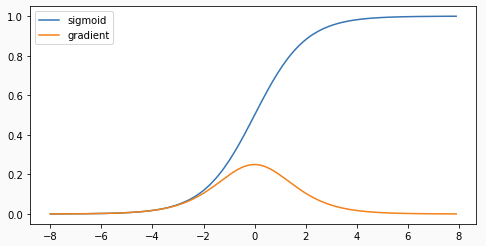

> 특정 구간에서 미분값이 0이 되어 버리는 sigmoid

```

```

## Normalization vs Standardization vs Regularization

```
셋의 공통점은 머신러닝 또는 딥러닝에 학습을 효율적으로 하거나 overfitting을 피하기 위한 방법들이다 
```

## Normalization

> 모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 re-scaling 방법 

```python
1. 데이터의 범위를 조정한다
2. 각 범위의 차이를 왜곡시키지 않고 데이터의 분포를 조정한다 
3. 값의 범위를 0~1사이의 값으로 바꾼다 
4. 예시 
- MinMaxScaler
- Standard Score
- Student's t-statistic
- Studentized residual
- Standardized moment
- Coefficient of variation
```

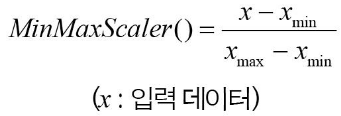

In [ ]:
!pip install -U mglearn

In [2]:
import mglearn

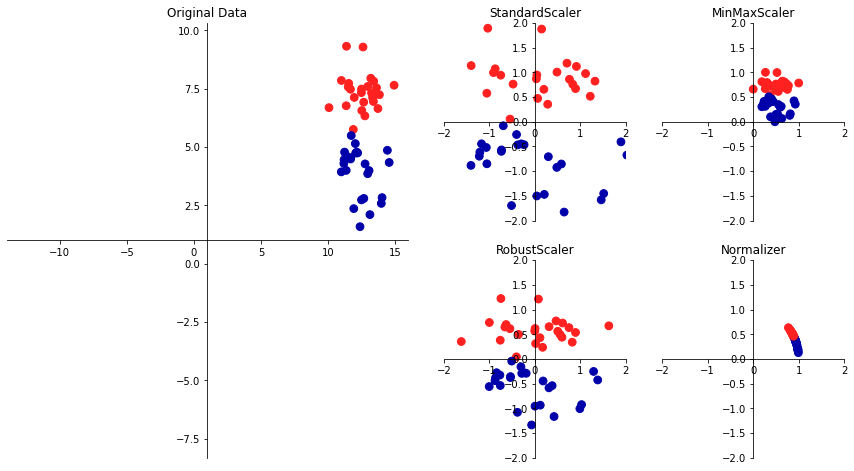

In [4]:
mglearn.plot_scaling.plot_scaling()

## Standardization

> 데이터가 평균으로부터 얼마나 떨어져 있는지 분포를 통해 확인하는 re-scaling 방법

```python
1. 값의 범위를 평균 0, 분산 1이 되도록 변환한다 
2. 예시 
- Standard Scaler
- z-score normalization
```

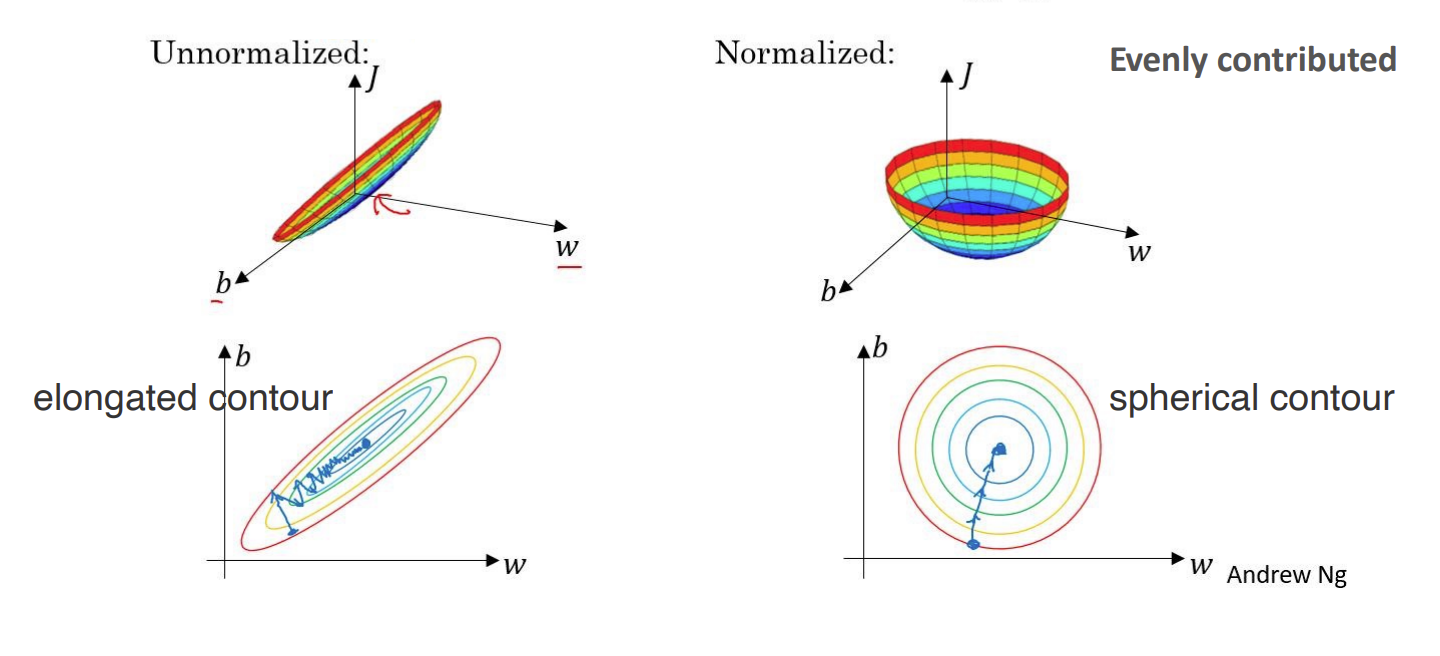

```
Normalization을 하지 않으면 데이터의 분포가 불균형한 경우 학습이 제대로 되지 않을 수도 있고 학습하기까지 시간이 오래 걸릴 수가 있다 
```

## Regularization

> 모델에 제약(penalty)을 줌으로써 overfitting을 방지하고 일반화 시키는 방법 <br>
> 주로 하이퍼 파라미터를 수정하는 방식으로 Regularization한다 

```python
모델의 설명도를 유지하면서 모델의 복잡도를 줄이는 방식 

1. Early stopping 
2. Noisy input
3. Drop-out
4. Pruning & feature selection
5. Ensemble
6. L1, L2 (Ridge, Lasso)
```

## Initializer

### Breaking the symmetry

```python
Breaking the symmetry는 신경망과 같은 기계 학습 모델을 초기화해야 하는 경우 지켜야할 조건이다  

기계 학습 모델의 가중치가 모두 동일한 값으로 초기화된 경우 모델이 학습될 때 가중치가 달라지는 것이 어렵거나 불가능할 수 있는데 이것을 "symmetry(대칭)"이라고 한다 
따라서 이러한 symmetry한 성질을 없애야 제대된 학습이 가능해진다 
```

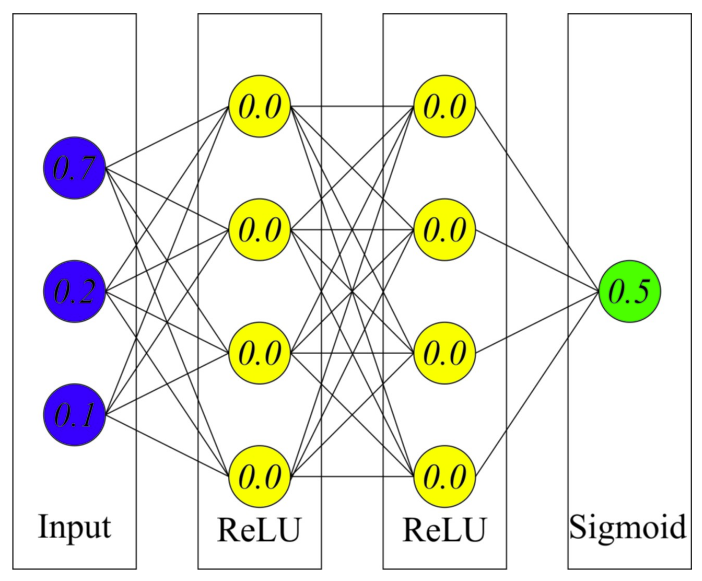

> 가중치를 0으로 초기화하는 경우 어떤 값이 들어와도 0이 되어버리기 때문에 0으로 초기화를 하면 안된다 

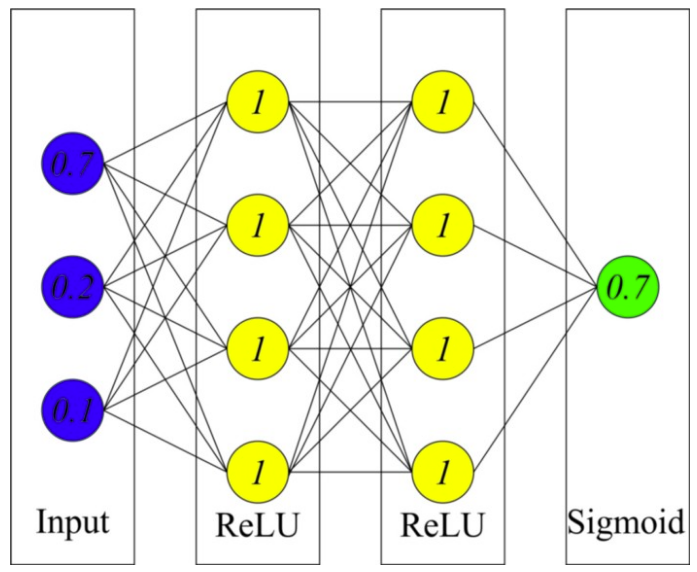

> 전부 같은 값으로 가중치를 초기화 하는 경우 같은 값이 나오기 때문에 동일한 가중치를 갖게 되므로 동일한 값으로 초기화 하는 것도 피해야 한다 

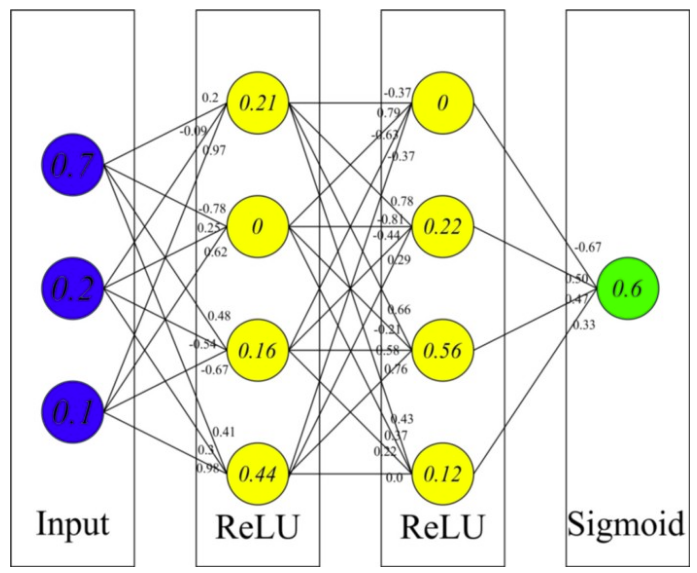

```
랜덤하게 가중치를 초기화 하는 것도 문제가 될 때가 있다
우연치 않게 계속 0으로 가중치가 초기화 되거나 같은 값으로 초기화가 될 수 있기 때문에 
값을 랜덤하게 초기화 하되 범위를 제약시켜 초기화시켜야 한다  

평균이 0이고 표준편차가 1인 정규분포에서 가중치를 랜덤하게 초기화 하면 가중치 업데이트가 정상적으로 될수 있다  
```

## Batch Normalization

```python
Normalization을 했음에도 'layer가 깊어짐'에 따라 좋지 못한 성능을 보일때가 있다 
이때 Internal Covariance Shift와 같은 문제가 발생하기도 한다 

'Batch normalization'은 internal covariance shift문제가 발생하는 것을 방지하기 위해 만들어진 기법이다
(사실상 2017년 후속논문을 통해 'internal covariance shift문제를 해결하진 못했지만 효과는 좋더라'라고 밝혀졌다)

Internal Covariance shift: 학습 도중 이전 layer의 파라미터 변화로 인해 원래 분포와 전혀 상관없는 분포로 바뀌어버리는 현상  
```

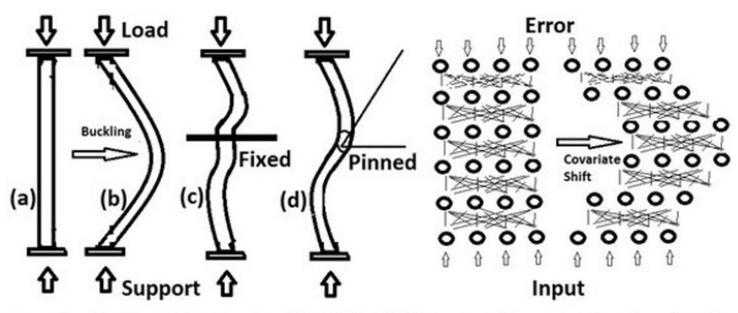

## Whitening

> 평균을 0, 표준편차를 1로 만드는 작업

## BN 방법

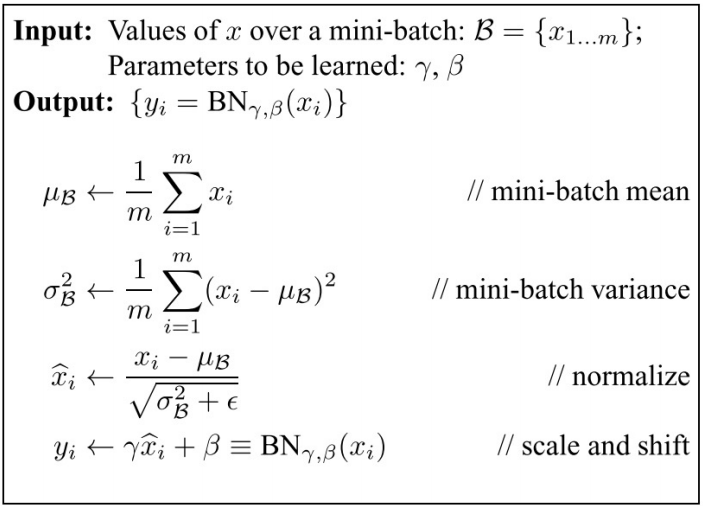

```python
1. 'samling한 평균은 전체 평균과 같아진다'는 특징을 활용하여 학습할 때 batch 단위로 whitening을 진행한다 
2. whitening할 때 분모의 값이 0이 되는 것을 방지하여 아주 작은 값인 엡실론을 더한다 (numerical stability를 보장하기 위해)
3. scale and shift연산을 한다 (learned parameter γ,β를 추가한다)
- BN은 activation layer이전에 위치하는데 normalization을 한 후에 activation layer를 통과하게 되면 non-linearity를 감소시킬 우려가 있다 
  따라서 γ,β를 추가함으로써 학습을 통해 찾아내고 non-linearity한 성질을 유지시킨다  
```

## BN Test-time

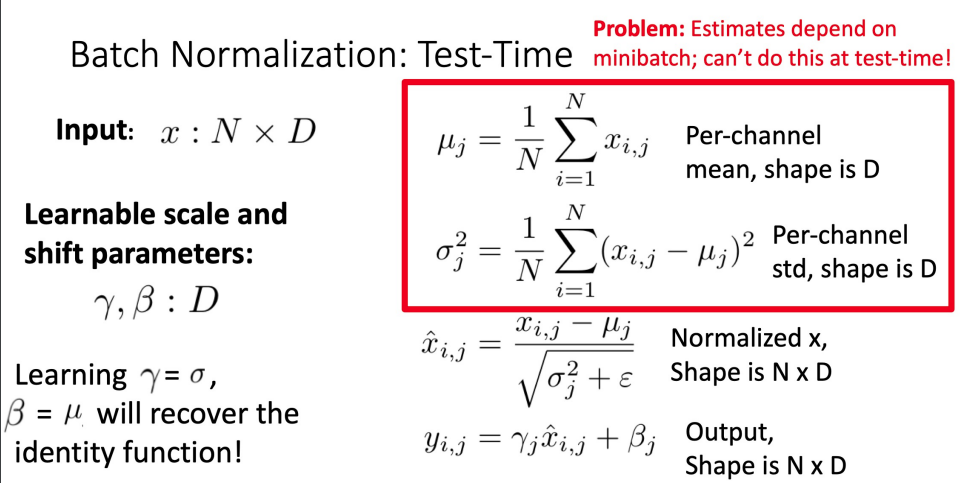

```
기본적으로 ML에서 테스트할 때 학습했을 방법과 똑같이 사용한다
예를 들어 minmax를 했다면 테스트 할 때도 minmax를 한 후에 예측한다

BN 테스트할 때에도 모든 배치의 평균과 표준편차들을 이동평균을 하여 사용한다 

이동평균: 이동평균은 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는 계산이다
```

## BN 예시

In [5]:
import tensorflow as tf 

In [8]:
resnet = tf.keras.applications.ResNet50()

In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1,3, input_shape=(32,32,3),),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(2,3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

In [18]:
# batch normalization은 training동안에 epsilon, gamma(scale), beta(shift), moving_mean(이동평균), moving_var(이동표준편차)를 구한다   
# 따라서 param이 4개 인 것이다(이동평균, 이동표준편차는 하나의 쌍) 
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 1)         28        
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 1)         4         
_________________________________________________________________
re_lu_6 (ReLU)               (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 2)         8         
_________________________________________________________________
re_lu_7 (ReLU)               (None, 28, 28, 2)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)             

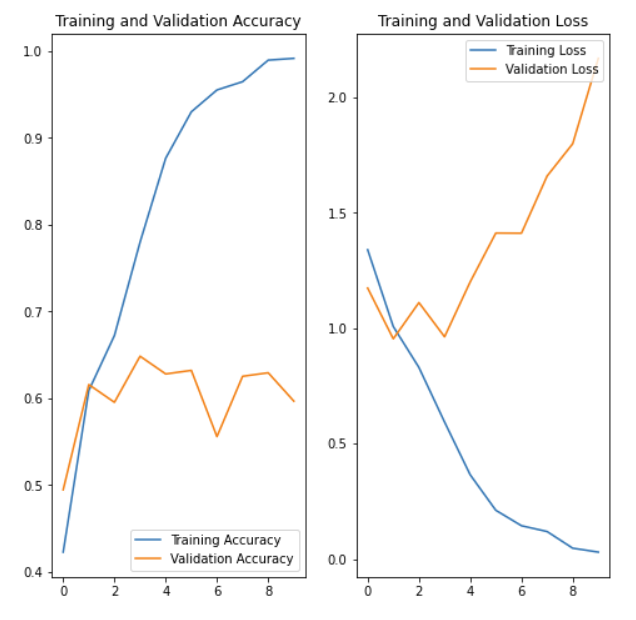

```
Training accuarcy는 높아지지만 validation accuracy가 스파이크 형태를 띄는 것은 데이터가 부족하다는 의미이다 
즉 overfitting되었기 때문에 데이터의 양을 늘려야 한다 => data augmentation을 해야 한다 
```

## Data augmentation

In [25]:
img_height = 256 
img_width = 256
num_classes = 10

# random jittering or random crop 후 
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(img_height, img_width,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2), # 데이터가 확보된 후에 overfitting을 방지하기 위해 사용한다   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])